In [1]:
#%matplotlib inline
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import math
sys.path.append(os.path.join(os.getcwd(), 'modules'))
import intersections as isec

No traceback available to show.


## Line equation

A frequently used approach to represent a straight line is to specify points $(x,y)$ on a line by a vector $\vec{v}$:


$$
\vec{v} = \begin{pmatrix} x \\ y \end{pmatrix} = \underbrace{d \cdot \begin{pmatrix} cos\left( \theta \right) \\ sin\left( \theta \right) \end{pmatrix}}_{\vec{d}} + t \cdot \underbrace{\begin{pmatrix} -sin\left( \theta \right) \\ cos\left( \theta \right) \end{pmatrix}}_{\vec{n}}
$$

Vector $\vec{d}$ and $\vec{n}$ are orthogonal. For fixed values of $d$ and $\theta$ we get a straight line by varying scalar value $t$.

$$
x = d \cdot cos\left( \theta \right)  - t \cdot sin\left( \theta \right)
$$
$$
y = d \cdot sin\left( \theta \right)  + t \cdot cos\left( \theta \right)
$$

---

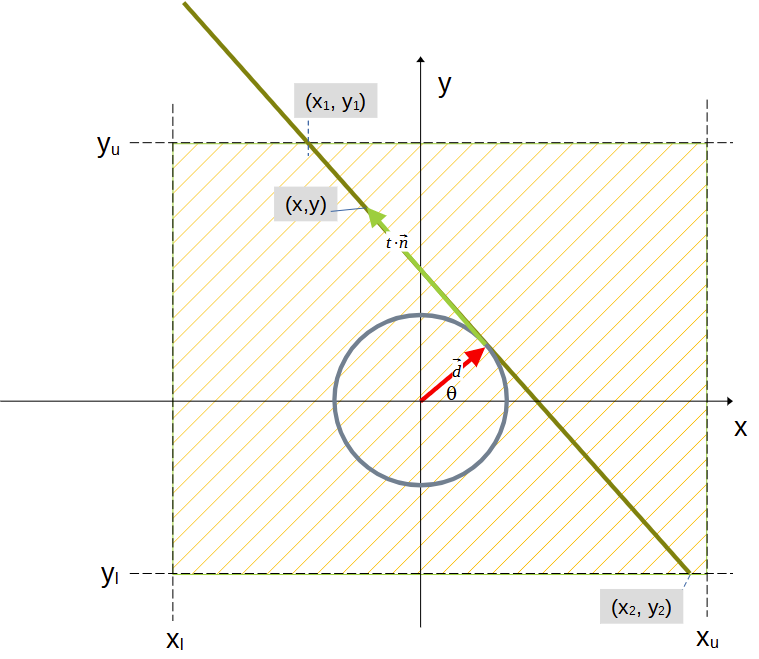

## Intersections

If the line intersects with the rectangle, an intersection may occur for these cases:

**case#1**

intersection occurs on the left side of the rectangle for $x=x_l$ and a specific value $y$ in the range $y_l \le y \le y_u$. 

$$
x_l = d \cdot cos\left( \theta \right)  - t_{c1} \cdot sin\left( \theta \right)
$$

with $t_{c1}$ :

$$
t_{c1} = \frac{d \cdot cos\left( \theta \right) - x_l}{sin\left( \theta \right)}
$$

$$
y = d \cdot sin\left( \theta \right)  + t_{c1} \cdot cos\left( \theta \right)
$$

If $y$ is in the interval $y_l \le y \le y_u$ then we have an intersection.


**case#2**

intersection occurs on the right side of the rectangle for $x=x_u$ and a specific value $y$ in the range $y_l \le y \le y_u$.

$$
x_u = d \cdot cos\left( \theta \right)  - t_{c2} \cdot sin\left( \theta \right)
$$

with $t_{c2}$ :

$$
t_{c2} = \frac{d \cdot cos\left( \theta \right) - x_u}{sin\left( \theta \right)}
$$

$$
y = d \cdot sin\left( \theta \right)  + t_{c2} \cdot cos\left( \theta \right)
$$

If $y$ is in the interval $y_l \le y \le y_u$ then we have an intersection.

**case#3**

intersection occurs on the upper side of the rectangle for $y=y_u$ and a specific value $x$ in the range $x_l \le x \le x_u$.

$$
y_u = d \cdot sin\left( \theta \right)  + t_{c3} \cdot cos\left( \theta \right)
$$

with $t_{c3}$ :

$$
t_{c3}= \frac{y_u - d \cdot sin\left( \theta \right)}{ cos\left( \theta \right)}
$$

$$
x = d \cdot cos\left( \theta \right)  - t_{c3} \cdot sin\left( \theta \right)
$$

If $x$ is in the interval $x_l \le x \le x_u$ we have an intersection.


**case#4**

intersection occurs on the lower side of the rectangle for $y=y_l$ and a specific value $x$ in the range $x_l \le x \le x_u$.

$$
y_l = d \cdot sin\left( \theta \right)  + t_{c4} \cdot cos\left( \theta \right)
$$

with $t_{c4}$ :

$$
t_{c4}= \frac{y_l - d \cdot sin\left( \theta \right)}{ cos\left( \theta \right)}
$$

$$
x = d \cdot cos\left( \theta \right)  - t_{c4} \cdot sin\left( \theta \right)
$$

If $x$ is in the interval $x_l \le x \le x_u$ we have an intersection.

Special cases are $\theta = 0$ and $\theta = \frac{\pi}{2}$.

**case#5: $\theta = 0$**

For $x$ in $x_l \le x \le x_u$ intersections occur at points $x, y_l$ and $x, y_u$.


**case#6: $\theta = \frac{\pi}{2}$**

For $y$ in $y_l \le y \le y_u$ intersections occur at points $x_l, y$ and $x_u, y$.

---

## Some examples


A rectangle with corners at $\left(x_l=-5, y_l=-6 \right)$, $\left(x_l=-5, y_u= 7 \right)$, $\left(x_u=4, y_l=-6 \right)$ and $\left(x_u=4, y_u=7 \right)$

The code to compute intersections is in Python file `intersections.py`

In [2]:
# the rectangular region
x_l = -5
x_u = 4.0
y_l = -6.0
y_u = 7.0

# line parameters
d = 4.5
phi_deg = 171.0
dx = d * math.cos(math.radians(phi_deg))
dy = d * math.sin(math.radians(phi_deg))

In [3]:
# compute intersections if there are any ...
pCount, iPoints = isec.intersections(d, phi_deg, x_l, x_u, y_l, y_u)
print(f"pCount  : {pCount}")
print(f"iPoints : {iPoints}")

pCount  : 2
iPoints : [[-5, -2.802718076626738], [-3.4474019837742578, 7.0]]


In [4]:
if pCount == 2:
    xvec = [iPoints[0][0], iPoints[1][0]]
    yvec = [iPoints[0][1], iPoints[1][1]]


## Display Intersection (if available)

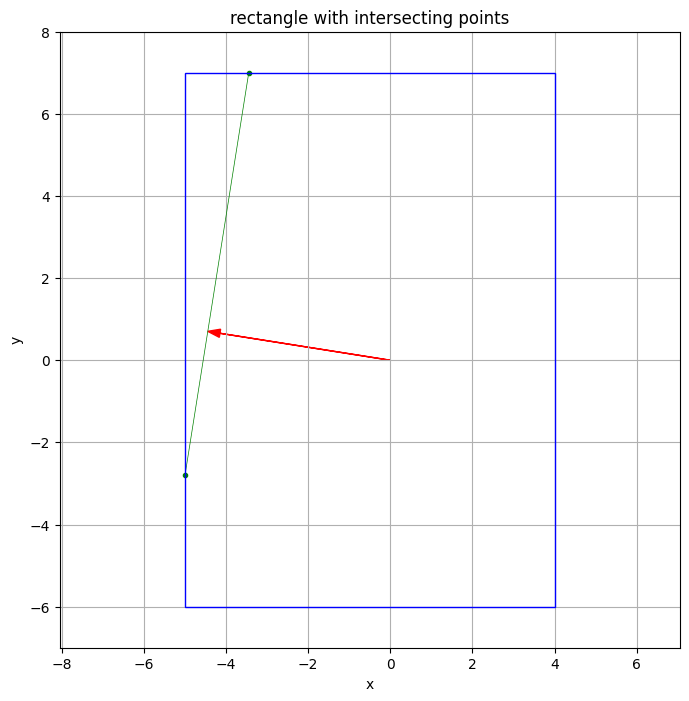

In [5]:
fig1 = plt.figure(1, figsize=[8, 8])
ax_f1 = fig1.add_subplot(1, 1, 1)
ax = plt.gca()
ax_f1.add_patch(pat.Rectangle( (x_l, y_l), width=(x_u - x_l), height=(y_u - y_l), edgecolor='b', facecolor='lightgrey', fill=False, zorder=3))
# ax_f1.legend()

# plot arrow
ax_f1.arrow(0, 0, dx, dy, color='r', length_includes_head=True, head_width=0.2)

# plot intersecting line
if pCount == 2:
    ax_f1.plot(xvec, yvec, color='g', linewidth=0.5, marker='o', markersize=3)

ax_f1.axis('equal')
ax_f1.grid(True)
ax_f1.set_xlabel('x')
ax_f1.set_ylabel('y')
ax_f1.set_title('rectangle with intersecting points');
ax_f1.set_xlim(x_l - 1, x_u + 1)
ax_f1.set_ylim(y_l - 1, y_u + 1);

## Application on an Image

1) Load image from file

2) compute intersections for a set of $d$ and $\theta$.

3) plot intersections


### Load file

1) Determine the shape of image data `Nx` number of columns and `Ny` the number of rows

2) Define the rectangular region which encloses the image

    1) the rectangular boudaries of the image are determines by 4 points:

        1) lower left corner: (x_l, y_l)
          
        2) upper left corner  (x_l, y_u)
      
        3) lower right corner: (x_u, y_l)
      
        4) upper right corner: (x_u, y_u)
      
**Note** 

at this point *no* image coordinates are used. (image coordinates have the upper left corner at (0,0))

In [6]:
# load file
imgFile = "images/testImgRect1.npy"
img = np.load(imgFile)
Nx = img.shape[1]
Ny = img.shape[0]
print(f"size of image: {img.size} ; shape of image: {img.shape}")

size of image: 1800000 ; shape of image: (1000, 1800)


In [7]:
# Define boundaries of the rectangular region
x_l = 0  # left x
x_u = Nx - 1 # right x
y_l = 0 # bottom y
y_u = Ny - 1 # top y

### Compute a projection line

**Recipe**

1) For fixed parameters $d$ and $\theta$ the intersecting points (if there are any) of the the projection line are determined

2) The projection line is defined by an array of x-Indices `indexX` an an array of y-Indices `indexY`


In [8]:
# line parameters
d = 1000
phi_deg = 40.0

# compute intersections
pCount, iPoints = isec.intersections(d, phi_deg, x_l, x_u, y_l, y_u)

if len(iPoints) == 2:
    # intersection
    x1 = iPoints[0][0]
    y1 = iPoints[0][1]
    x2 = iPoints[1][0]
    y2 = iPoints[1][1]
    indexX, indexY = isec.projectionIndices(iPoints, Nx, Ny)
    
    dx = x2 - x1
    dy = y2 - y1
    if dx != 0:
        slope = dy/dx
    else:
        slope = math.nan
        
    print(f"slope : {slope}")
    print(f"pCount  : {pCount}")
    print(f"iPoints : {iPoints}")
    print(f"dx : {dx} ; dy : {dy}")

slope : -1.1917535925942102
pCount  : 2
iPoints : [[467.1467577861758, 999], [1305.4072893322784, 0]]
dx : 838.2605315461026 ; dy : -999


### Apply correction for image coordinates

since the image is displayed in image coordinates with x=0 y=0 being the upper left corner of the image, the intersection points
must be transformed into image coordinates.

the transformation only affects the y coordinate which is flipped *up / down*.

the physical y coordinates are transformed to image coordinates using

`Ny -1 - (physical_Y_coordinates)`

Text(0.5, 1.0, 'test image')

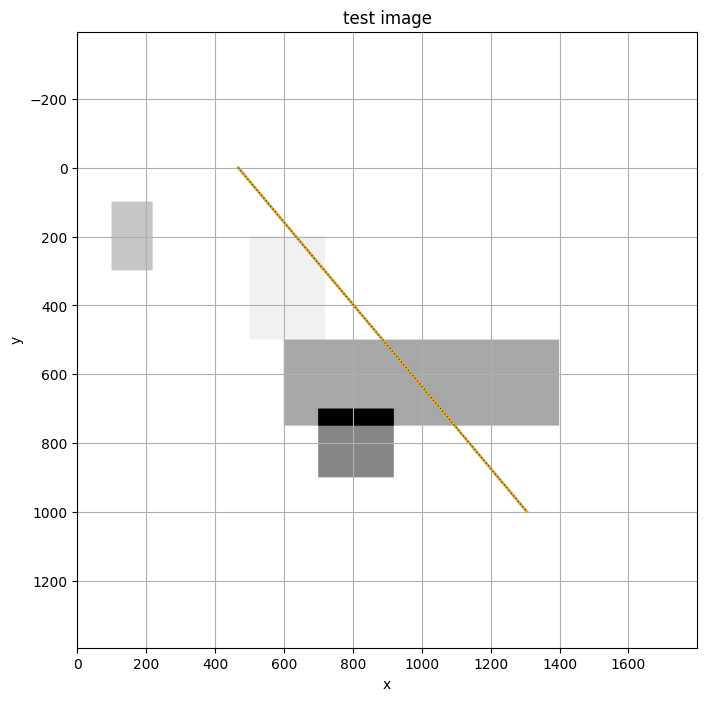

In [9]:
fig2 = plt.figure(2, figsize=[8, 8])
ax_f2 = fig2.add_subplot(1, 1, 1)

ax_f2.imshow(img, cmap='Greys' )
ax_f2.axis('equal')
ax_f2.plot([x1, x2], [Ny - 1 - y1, Ny - 1 - y2], linewidth=2, color='#f5a142')
ax_f2.plot(indexX, Ny -1 - indexY, linewidth=1, color='g', linestyle=':')
ax_f2.grid(True)
ax_f2.set_xlabel('x')
ax_f2.set_ylabel('y')
ax_f2.set_title('test image')

## Computing Projections

1) define a fixed angle $\theta$ for which projections shall be computed

2) define an array of d-values

3) for each d-value compute a projection line and the accumulated value along that line

4) display the image and the projection lines


In [10]:
# the rectangular region
x_l = 0
x_u = Nx - 1
y_l = 0
y_u = Ny - 1

# line parameters
d_min = -1000
d_max = 2000
Nd = 200
dVec = np.linspace(d_min, d_max, Nd)
theta_deg = 120.0

dv, projectionVec = isec.projections(dVec, theta_deg, x_l, x_u, y_l, y_u, Nx, Ny)


In [15]:
projection = []

for pLine in projectionVec:
    xvec, yvec = pLine
    if (xvec is None) or (yvec is None):
        projection.append(None)
    else:
        projection.append(np.sum(img[Ny - 1 - yvec, xvec])) # by summing up all values of img along the projection line we get the value of the projection

projection = np.array(projection)

In [16]:
xvec, yvec

(None, None)

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

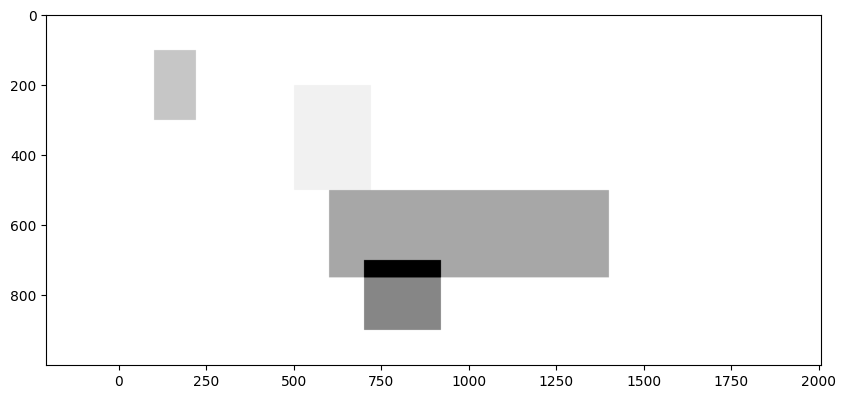

In [17]:
fig3 = plt.figure(3, figsize=[10, 10])
ax_f31 = fig3.add_subplot(2, 1, 1)
ax_f31.imshow(img, cmap='Greys' )

ax_f31.axis('equal')
# projection lines
for pLine in projectionVec:
    xvec, yvec = pLine
    d_x = d_max * math.cos(math.radians(theta_deg))
    d_y = d_max * math.sin(math.radians(theta_deg))
    ax_f31.plot(xvec, Ny - 1 - yvec, linewidth=0.2, color='b', linestyle='-')
    ax_f31.plot([0, d_x], [Ny -1, Ny - 1 - d_y], linewidth=1, color='r')

# x_left, x_right = ax_f3.get_xlim()
# y_bottom, y_top = ax_f3.get_ylim()
# x_offset = (x_right - x_left) * 0.1
# y_offset = (y_top - y_bottom) * 0.1
# ax_f3.text(x_left+x_offset, y_top-y_offset, f"theta °deg: {angle:8.3f}")
ax_f31.grid(True)
ax_f31.set_xlabel('x')
ax_f31.set_ylabel('y')
ax_f31.set_title(f"projection-lines: @theta °deg: {theta_deg:8.3f}")


# plot projection as a subplot

ax_f32 = fig3.add_subplot(2, 1, 2)

ax_f32.plot(dv, projection, linewidth=1, color='b', linestyle='-')

ax_f32.grid(True)
ax_f32.set_xlabel('d')
ax_f32.set_ylabel('$P(d, \\theta)$')
ax_f32.set_title(f"projection : @$\\theta$: {theta_deg:8.3f} ° [deg]")